In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [1]:
nodes, weights = qnwlege(500, 0.0,8.0)

LoadError: [91mUndefVarError: qnwlege not defined[39m

In [2]:
Ts=collect(50.01:10:500.01)
#Ts=collect(663.8:0.01:664.0)#[663.0,663.1]
numofn=[-1.5e20]#,-7.3e19,-2.0e19,-0.15e19]#,-0.2e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]#,1e17,1e17,1e17]#,1e17]
xs=[0.287]#,0.3,0.3,0.3]#[0.287,0.3,0.262,0.332]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=0.0
Ev(var)=Eoff
Ec(var)=Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x
alphanp=0.0#1/EgSiGe([Ts[1],xs[1]])


effMassV(var)=-1.2*me
effMassC(var)=1.4/6^(2/3)*me#0.321me#0.424*me#0.424*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),alphanp,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC,bandC,bandC,bandC,bandC,bandC],var0)#,bandC,bandC,bandC,bandC,bandC,bandV],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV

md=effMassC([Ts[1],xs[1]])*6^(2/3)#1.4*me;
function Deftemp(band::parBandTx)
    Da=7.0
    Dv=3.8
    if band==bandC
        return [Da,Dv]#10.5#15.0
    end
    if band==bandV        
        return [Dv,Da]#7.0
    end
end
ksi=21.0
#tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],Deftemp(var[6])[2],var[2],var[1],var[3],var[6])#DefP(var[1])
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),Deftemp(var[6])[1],var[2],var[1],var[3],var[6])#DefP(var[1])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI],vartau0)#tauNI,,tauII2,tauAC,
xmax=3.0
#T_EF_Dict=Dict()
#println("-3")

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

 26.858713 seconds (125.84 M allocations: 37.652 GiB, 11.51% gc time)


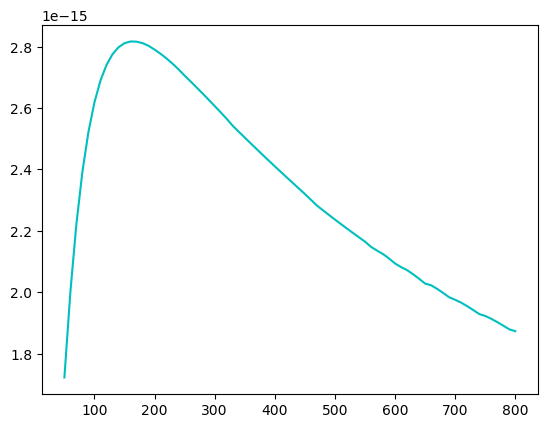

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feea8db96a0>

In [4]:
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="c")

In [5]:
map(i->println(sigmas[i,1,1]/6^(2/3)),1:length(sigmas[:,1,1]))

1.7223936146769676e-13
2.002058370514896e-13
2.2230111357438416e-13
2.393304102158883e-13
2.522310048703473e-13
2.6187934052570477e-13
2.6896196570765295e-13
2.740325671627418e-13
2.7754052307916343e-13
2.7982317578046367e-13
2.8114065446174157e-13
2.8170363348856584e-13
2.816492021895812e-13
2.8116329856299797e-13
2.8029069042087956e-13
2.7905487562604667e-13
2.776982341253025e-13
2.761497804366375e-13
2.744458504788063e-13
2.726086002412896e-13
2.705671561610355e-13
2.686721184281531e-13
2.667238675436653e-13
2.647354161698458e-13
2.6271644446352697e-13
2.6067307456797685e-13
2.58606225349354e-13
2.56503236146007e-13
2.542336008865495e-13
2.52308239204564e-13
2.503925458627522e-13
2.484891396993856e-13
2.465999792955121e-13
2.4472642432873623e-13
2.428692614657434e-13
2.4102868288131046e-13
2.3920418877607026e-13
2.3739434452955264e-13
2.3559620689949506e-13
2.338038253116263e-13
2.3200323322055144e-13
2.3014153354375345e-13
2.2825906622252106e-13
2.267154184946674e-13
2.251934492524

76-element Array{Void,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 ⋮      
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [6]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-Ec([iT,kx])
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))

In [7]:
Efsr

76×1×1 Array{Float64,3}:
[:, :, 1] =
 0.0732565 
 0.0731812 
 0.0731178 
 0.0730027 
 0.0728314 
 0.0726768 
 0.0724991 
 0.0722793 
 0.0720576 
 0.0718171 
 0.0715464 
 0.0712507 
 0.0709344 
 ⋮         
 0.0233752 
 0.0219535 
 0.0205163 
 0.0190637 
 0.0175959 
 0.0161132 
 0.0146155 
 0.0131031 
 0.0115762 
 0.0100348 
 0.00847917
 0.00690938

In [8]:
sigmaetest=[2778200.28109668,2312314.78954883,1979047.65108095,
1728673.76291633,1533555.01584136,1377114.43355248,
1248805.37673395,1141599.77536841,1050634.83341348,
972439.919995827,904471.685107134,844824.119432157,792040.704331033,
744989.051108251,702775.404932162,664684.741110955,630138.029017717,
598661.203865750,569862.264585959,543414.122446974,519041.586412879,
496511.367377109,475624.315110431,456209.326943280,438118.522494679,
421223.387385095,405411.665863276,390584.837576167,376656.053874064,
363548.438528403,351193.679615310,339530.855692561,328505.451770088,
318068.529998983,308176.027240837,298788.157277877,289868.899786311,
281385.561616717,273308.398626170,265610.288451872,258266.446329570,
251254.177436508,244552.660350078,238142.757115445,232006.846151052,226128.674823646,
20493.229020525,215086.617456580,209895.968793988,204909.339935751,
200115.634091359,195504.527411760,191066.403158375,186792.292512520,
182673.821251642,178703.161620907,174872.988815782,171176.441565810,
167607.086373726,164158.885019091,160826.164983095,157603.592492233,
154486.147914173,151469.103270028,148548.001654251,145718.638376829,
142977.043663105,140319.466764544,137742.361349632,135242.372058065,
132816.322113651,130461.201902250,128174.158430658,125952.485590895,
123793.615161891,121695.108487312]
x=3.0

3.0

In [9]:
sigmas/6^(2/3)

76×1×1 Array{Float64,3}:
[:, :, 1] =
 1.72239e-13
 2.00206e-13
 2.22301e-13
 2.3933e-13 
 2.52231e-13
 2.61879e-13
 2.68962e-13
 2.74033e-13
 2.77541e-13
 2.79823e-13
 2.81141e-13
 2.81704e-13
 2.81649e-13
 ⋮          
 1.98375e-13
 1.97548e-13
 1.96614e-13
 1.95464e-13
 1.94215e-13
 1.92904e-13
 1.92279e-13
 1.91355e-13
 1.90278e-13
 1.89124e-13
 1.87922e-13
 1.8732e-13 

In [10]:
map(x->sigmas[x,1,1],1:76)

76-element Array{Float64,1}:
 5.68722e-13
 6.61065e-13
 7.34022e-13
 7.90252e-13
 8.32848e-13
 8.64707e-13
 8.88093e-13
 9.04836e-13
 9.16419e-13
 9.23956e-13
 9.28306e-13
 9.30165e-13
 9.29985e-13
 ⋮          
 6.55021e-13
 6.52288e-13
 6.49205e-13
 6.45409e-13
 6.41285e-13
 6.36955e-13
 6.34891e-13
 6.31842e-13
 6.28284e-13
 6.24473e-13
 6.20505e-13
 6.18517e-13

In [11]:
#map(x->sigmas[x,1,1]/sigmaetest[x],1:76)

In [12]:
vartau1=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
Efxx=collect(0.0:0.1:3.0)
tau_check=Array{Float64}(length(Efxx))
vartau1[2]=300.0
vartau1[5]=Efsr[26]+vartau1[6].offset
for (li,l) in enumerate(Efxx)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI var[10]:bandV
    vartau1[3]=l+vartau1[6].offset
    tau_check[li]=1/(1/tauAC(vartau1)+1/tauII2(vartau1)+1/tauNI(vartau1))
    #tau_check[li]=1/(1/tauAC(vartau1))
    #tau_check[li]=1/(1/tauNI(vartau1))
    #tau_check[li]=1/(1/tauII2(vartau1))
end
#figure()
#plot(Efxx,tau_check,linestyle="-",color="b")
#grid()
x=3.0

3.0

In [13]:
tau_check

31-element Array{Float64,1}:
 NaN          
   4.49683e-14
   4.76184e-14
   4.74594e-14
   4.61088e-14
   4.43672e-14
   4.25665e-14
   4.08378e-14
   3.92277e-14
   3.77469e-14
   3.63915e-14
   3.51516e-14
   3.4016e-14 
   ⋮          
   2.81717e-14
   2.75507e-14
   2.69678e-14
   2.64193e-14
   2.59021e-14
   2.54135e-14
   2.4951e-14 
   2.45123e-14
   2.40957e-14
   2.36992e-14
   2.33214e-14
   2.29609e-14